# Polynomial Linear Regression

Polynomial Linear Regression, doğrusal regresyonun bir uzantısıdır ve veri noktalarının doğrusal olmadığı durumlarda kullanılır. Lineer regresyondan farklı olarak, model veriyle daha iyi uyum sağlamak için bağımsız değişkenin (X) polinom dereceli dönüşümlerini kullanır.

### Hangi Durumlarda Kullanılır?

Veri noktaları doğrusal değilse, yani bağımsız ve bağımlı değişkenler arasında doğrusal olmayan bir ilişki varsa kullanılır.
Eğilimleri daha iyi modellemek için, özellikle verinin zaman içindeki değişimini gösterdiği durumlarda.
Örüntü tanıma ve eğri uydurma işlemlerinde, özellikle karmaşık ilişkileri öğrenmek için.



Polynomial Regression, "doğrusal regresyon" olarak adlandırılmasına rağmen doğrusal olmayan bir modelleme tekniğidir çünkü değişkenleri doğrusal olmayan bir şekilde kullanır, ancak model parametreleri doğrusal olarak öğrenilir.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv("polynomial.csv",sep=";")

In [3]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


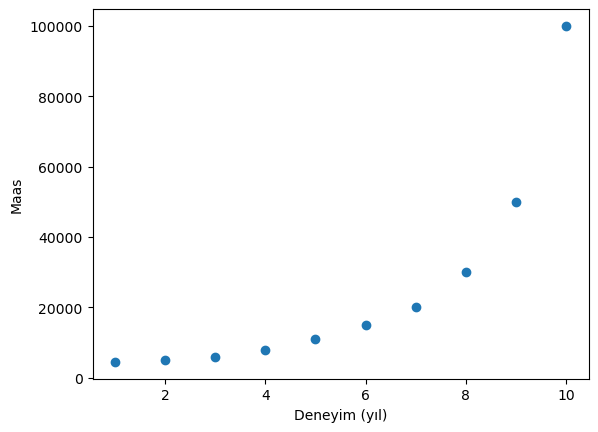

In [4]:
# veri seti çizimi
plt.scatter(df["deneyim"],df["maas"])
plt.xlabel("Deneyim (yıl)")
plt.ylabel("Maas")
plt.savefig("1.png",dpi=300)
plt.show()

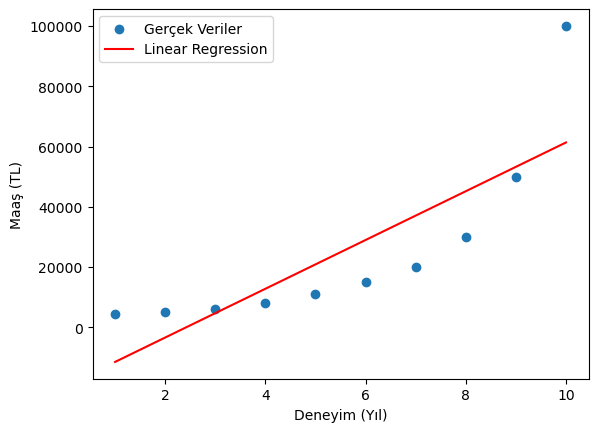

In [9]:
# doğrusal bir yapı yok linear regresyon yaparsak çok yanlış sonuçlar elde etmemiz muhtemel yine de gözlemleyelim

reg = LinearRegression()

X = df[["deneyim"]]
y = df["maas"]

reg.fit(X, y)

plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.scatter(df["deneyim"], df["maas"], label="Gerçek Veriler")

plt.plot(df["deneyim"], reg.predict(X), color="red", label="Linear Regression")

plt.legend()
plt.show()

In [21]:
polynomial_reg=PolynomialFeatures(degree=4)
# dereceyi  en iyi sonuç verecek şekilde ayarlayabiliriz
x_polynomial=polynomial_reg.fit_transform(df [["deneyim"]])

In [22]:
# regression modeli nesnesi olan reg nesnesini oluşturup fit metodunu çağırarak x_polynomial ve y eksenini fit ediyor
# yani regresyon modelimizi mevcut ve gerçek veriler ile eğitiyoruz.
reg=LinearRegression()
reg.fit(x_polynomial,df["maas"])

LinearRegression()

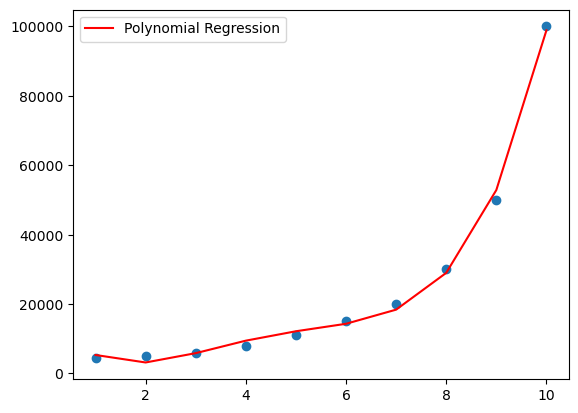

In [24]:
y_head = reg.predict(x_polynomial)
plt.plot(df["deneyim"],y_head,color="red",label="Polynomial Regression")
plt.legend()
plt.scatter(df["deneyim"], df["maas"])
plt.savefig("3.png",dpi=300)
plt.show()

In [25]:
x_polynomial=polynomial_reg.fit_transform([[4.5]])
reg.predict(x_polynomial)

array([10958.21496212])

In [26]:
# deneyim yılları seviyeleri temsil etmektedir. 4.5 seviyesinde yeni bir pozisyon açılırsa alması gereken maaşı bu şekilde bulabiliriz.